In [15]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OnlineNewsPopularity.csv to OnlineNewsPopularity.csv
User uploaded file "OnlineNewsPopularity.csv" with length 24311769 bytes


In [11]:
df_OnlineNewsPopulaty = pd.read_csv('OnlineNewsPopularity.csv')
print(df_OnlineNewsPopulaty)

                                                     url  ...   shares
0      http://mashable.com/2013/01/07/amazon-instant-...  ...      593
1      http://mashable.com/2013/01/07/ap-samsung-spon...  ...      711
2      http://mashable.com/2013/01/07/apple-40-billio...  ...     1500
3      http://mashable.com/2013/01/07/astronaut-notre...  ...     1200
4       http://mashable.com/2013/01/07/att-u-verse-apps/  ...      505
...                                                  ...  ...      ...
39639  http://mashable.com/2014/12/27/samsung-app-aut...  ...     1800
39640  http://mashable.com/2014/12/27/seth-rogen-jame...  ...     1900
39641  http://mashable.com/2014/12/27/son-pays-off-mo...  ...     1900
39642     http://mashable.com/2014/12/27/ukraine-blasts/  ...     1100
39643  http://mashable.com/2014/12/27/youtube-channel...  ...     1300

[39644 rows x 61 columns]


In [ ]:
df_OnlineNewsPopulaty.info()

In [55]:
df_OnlineNewsPopulaty_2 = df_OnlineNewsPopulaty
df_OnlineNewsPopulaty_2.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,NaN
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,NaN
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,NaN
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,NaN
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,NaN


In [57]:
#Pasó Previo
df_OnlineNewsPopulaty_2['log_n_tokens_content'] = np.log10(df_OnlineNewsPopulaty_2[' n_tokens_content']) 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [60]:
df_2 = df_OnlineNewsPopulaty_2['log_n_tokens_content']

In [78]:
df_3 = df_2.replace([-np.inf],0)

In [80]:
df_3.describe()

count    39644.000000
mean         2.556719
std          0.545567
min          0.000000
25%          2.390935
50%          2.611723
75%          2.854913
max          3.928088
Name: log_n_tokens_content, dtype: float64

Text(0, 0.5, 'N° de Arts')

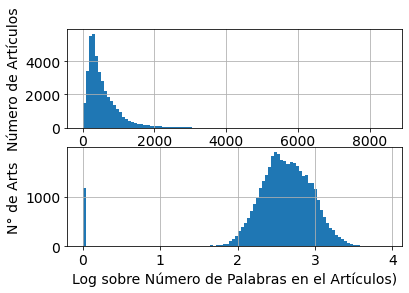

In [85]:
# Aplicación de Engineering Features - Función Log-Transformation
fig, (ax1, ax2) = plt.subplots(2,1)
df_OnlineNewsPopulaty[' n_tokens_content'].hist(ax=ax1 , bins=100)
ax1.tick_params(labelsize = 14)
ax1.set_xlabel('Número de Palabras en el Artículos', fontsize = 14)
ax1.set_ylabel('Número de Artículos', fontsize = 14)

# Transformación Logaritmica
df_3.hist(ax=ax2 , bins=100)
ax2.tick_params(labelsize = 14)
ax2.set_xlabel('Log sobre Número de Palabras en el Artículos)', fontsize = 14)
ax2.set_ylabel('N° de Arts', fontsize = 14)